In [2]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.4 MB/s eta 0:00:00


# **1. FRAME THE PROBLEM**
---

Spotify, with over 574 million monthly active users (MAUs) as of Q3 2023, is undoubtedly one of the most popular music streaming apps in the world today. However, despite its huge user base, Spotify has yet to turn a profit, with a net income of around -$576 million in 2023 reportedly. Therefore, we would like to explore ways to increase Spotify's revenue.  

According to reports, around 87% of Spotify's revenue is derived from its Premium subscribers. However, as of Q3 2023, Spotify had 361 million ad-supported free MAUs. Converting these users to paid plans presents a significant opportunity for the company.

Hence, our main question is:
**Who are more likely to become Spotify's subscribed users?**

Our task is to identify the factors that might influence the decision to subscribe and build a model to predict paid subscribers. Understanding their user profile will allow us to tailor marketing campaigns accordingly and accelerate conversion.

# 2. **DATA PREPARATION**
---

## About the dataset
#### The Spotify user behavior dataset is collected by Meera Ajayakumar using Google Form. It contains the following information about Spotify users:


> - Age - Age group of user?
> - Gender - Gender of user?
> - spotify_usage_period - How long have you been using Spotify?
> - spotify_listening_device - Which of the following devices do you primarily use to listen to Spotify?
> - spotify_subscription_plan - Which Spotify subscription plan do you currently have?
> - premium_sub_willingness - Are you willing to take a premium subscription or willing to continue with premium subscription in future?
> - preffered_premium_plan - If premium or willing to take premium, what amount do you pay for the subscription?
> - preferred_listening_content - What do you prefer to listen more?
> - fav_music_genre - What genre(s) of music do you enjoy the most?
> - music_time_slot - What is your favourite time slot to listen to music?
> - music_Influencial_mood - When it comes to listening to music, which of the following moods or situations most strongly influences your choice of music?
> - music_lis_frequency - When do you listen to music more often?
> - music_expl_method - How do you discover new music on Spotify?
> - music_recc_rating - How do you rate the spotify music recommendations?
> - pod_lis_frequency - How often do you listen to Podcast?
> - fav_pod_genre - What genre(s) of Podcast do you enjoy the most?
> - preffered_pod_format - What podcast format you generally prefer?
> - pod_host_preference - Are you more inclined to listen to podcasts from unknown personalities, or do you prefer podcasts hosted by well-known individuals?
> - preffered_pod_duration - Do you prefer shorter podcast episodes (under 30 minutes) or longer episodes (over 30 minutes)
> - pod_variety_satisfaction - Are you satisfied with the variety and availability of podcasts on Spotify?


In [3]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Import the dataset.
df = pd.read_excel('Spotify_data.xlsx', keep_default_na=False)

## Dataset overview

In [5]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       520 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

#### All the variables are categorical variables.

# 3. EXPLORATORY DATA ANALYSIS
---

## Missing Values

In [7]:
df.isnull().sum()

,0
Age,0
Gender,0
spotify_usage_period,0
spotify_listening_device,0
spotify_subscription_plan,0
premium_sub_willingness,0
preffered_premium_plan,0
preferred_listening_content,0
fav_music_genre,0
music_time_slot,0


#### there isn't any missing value.

## Univariate Analysis
#### We will first examine each variable by creating frequency tables and bar charts.  

In [9]:
for n in df.columns:
    print(df[n].value_counts())

Age
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64
Gender
Female    391
Male      114
Others     15
Name: count, dtype: int64
spotify_usage_period
More than 2 years     169
1 year to 2 years     141
6 months to 1 year    119
Less than 6 months     91
Name: count, dtype: int64
spotify_listening_device
Smartphone                                                                              300
Computer or laptop                                                                       54
Smartphone, Computer or laptop                                                           48
Smart speakers or voice assistants                                                       43
Computer or laptop, Smart speakers or voice assistants                                   14
Smartphone, Smart speakers or voice assistants                                           10
Smartphone, Wearable devices                                                              8
Smartphone

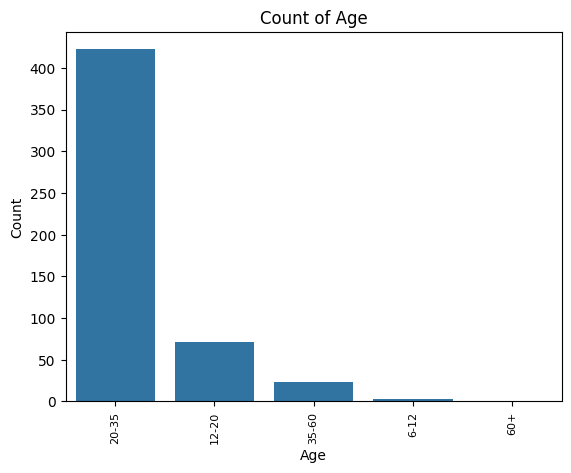

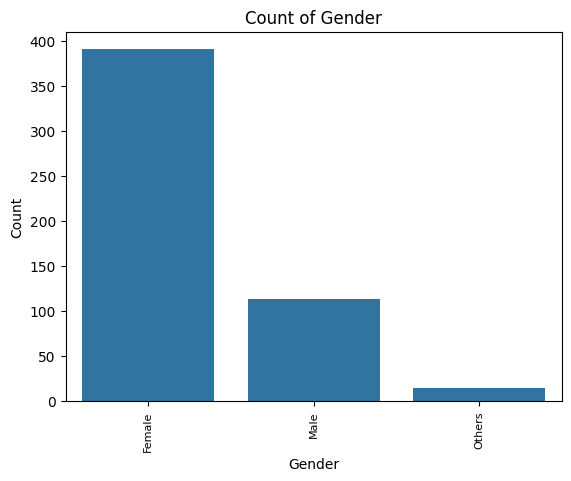

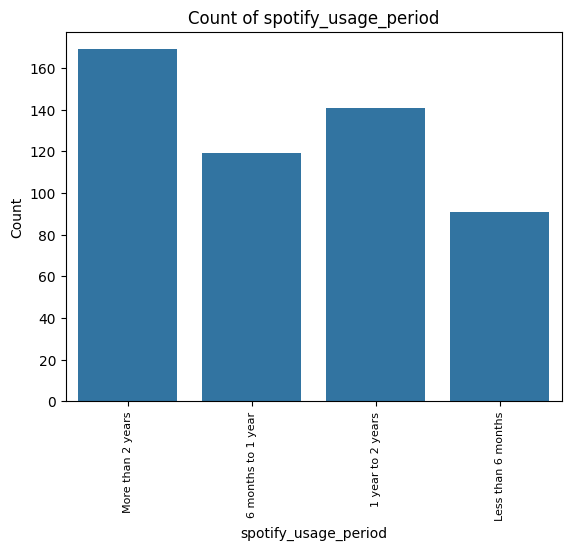

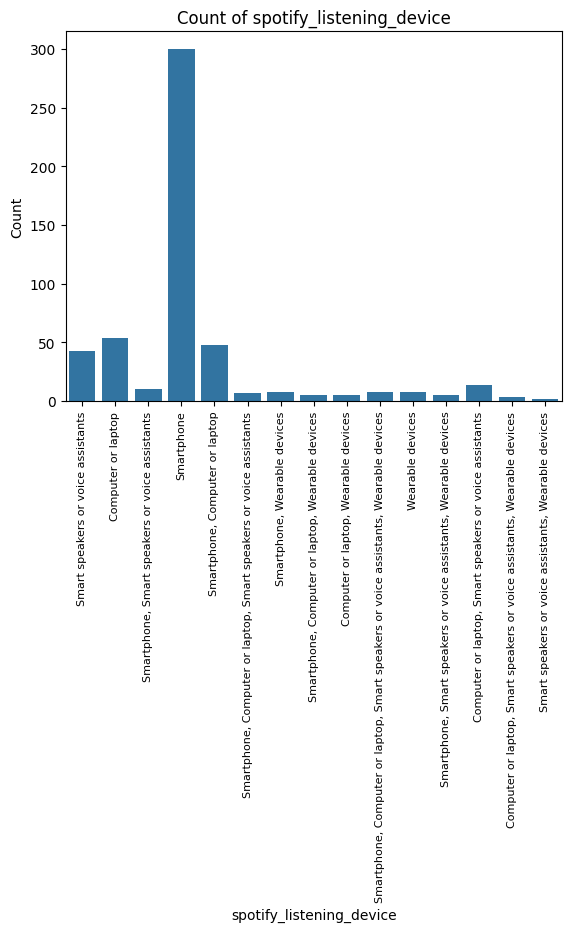

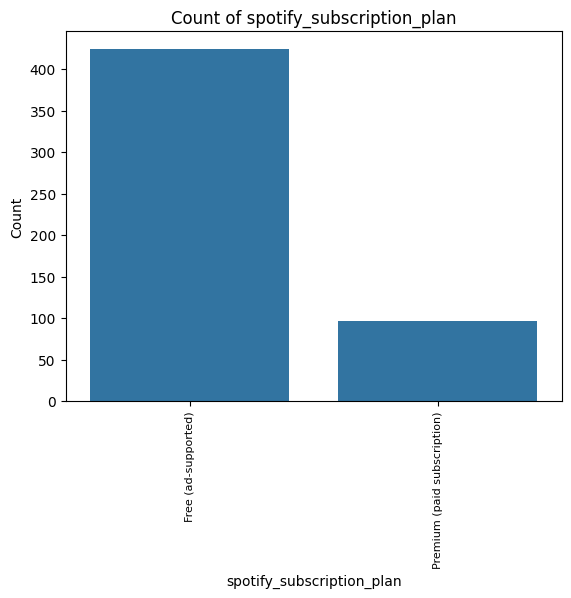

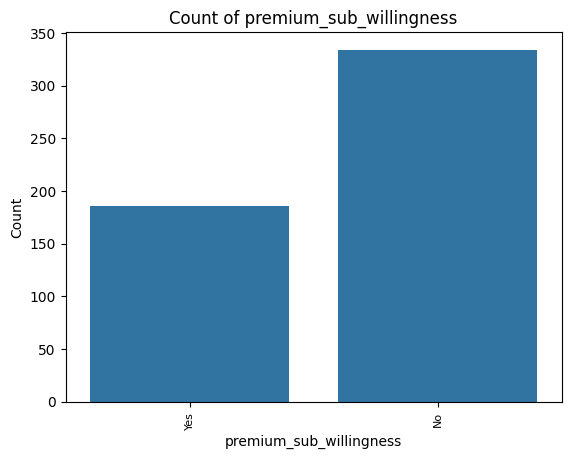

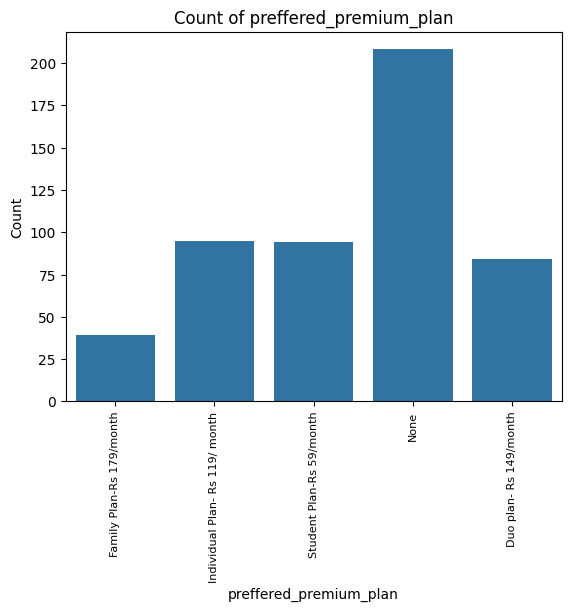

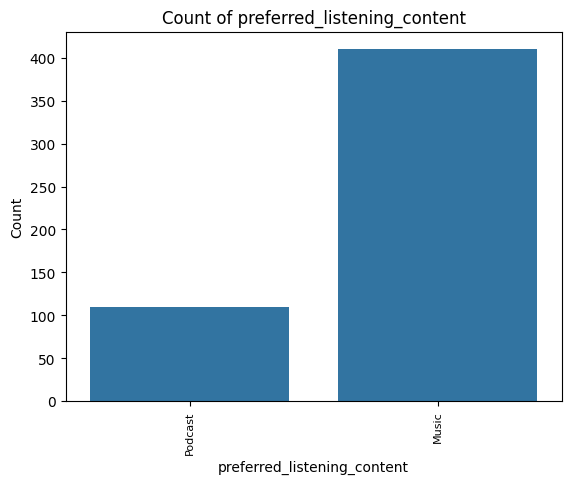

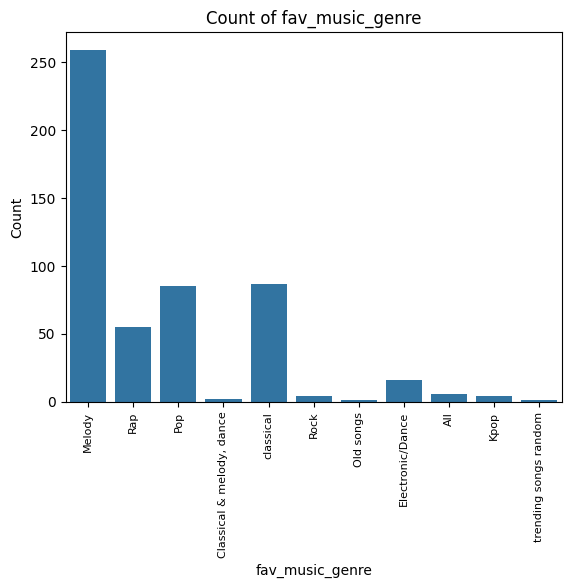

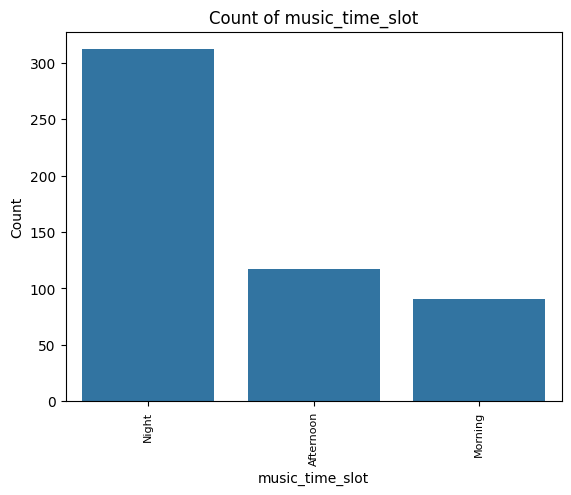

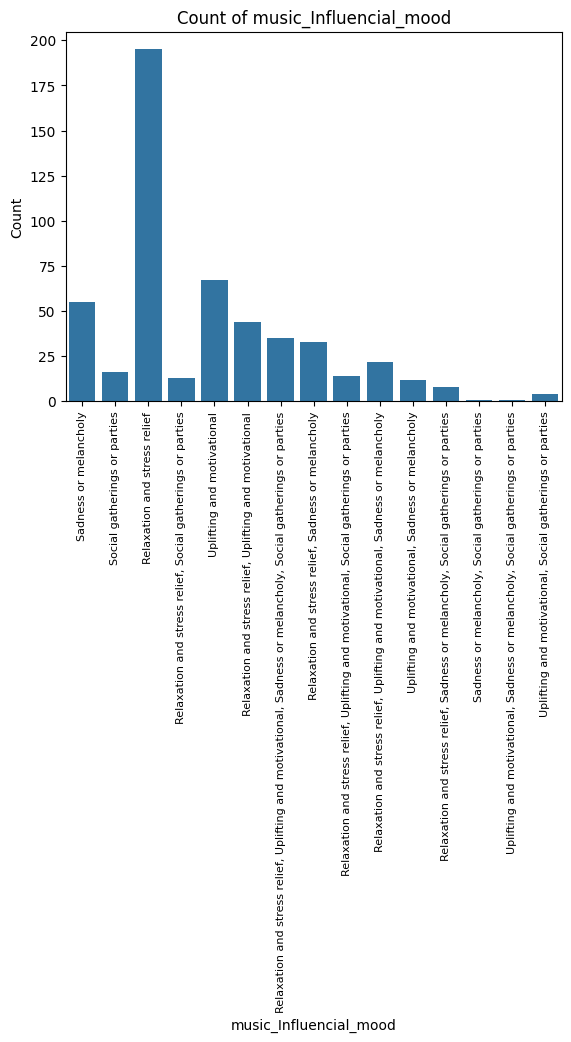

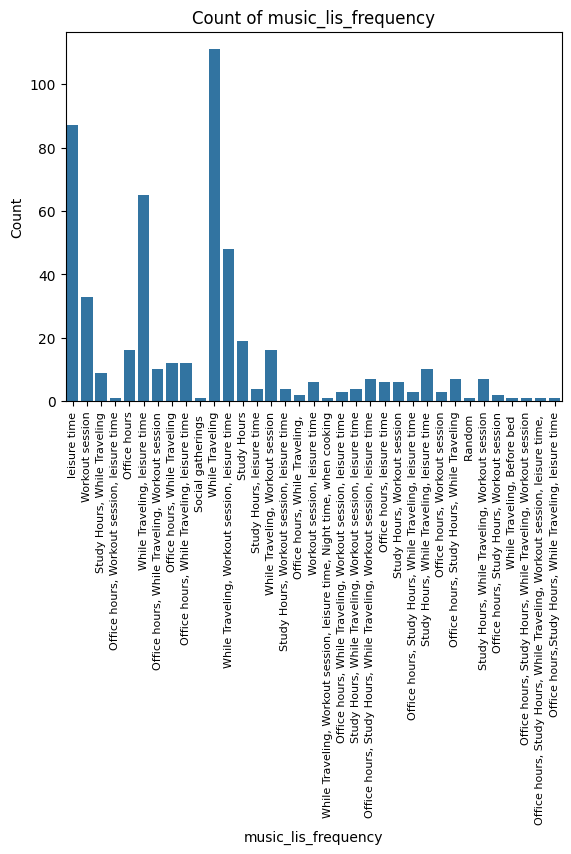

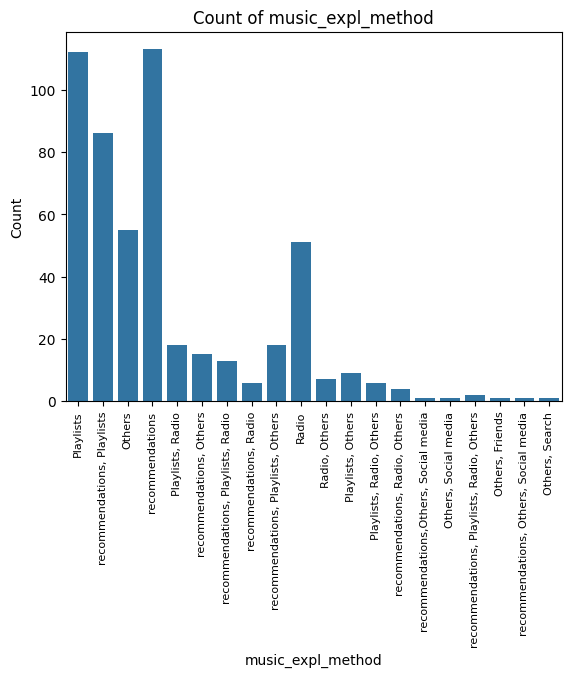

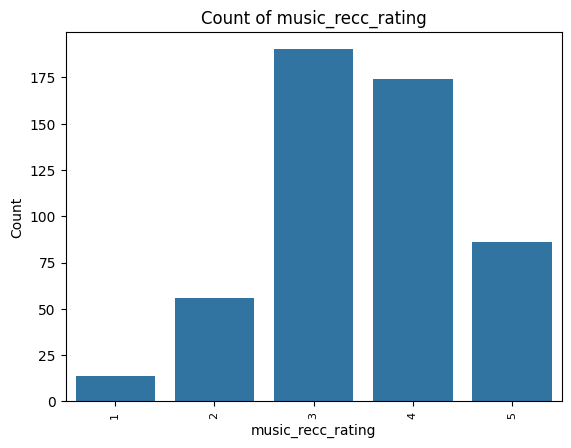

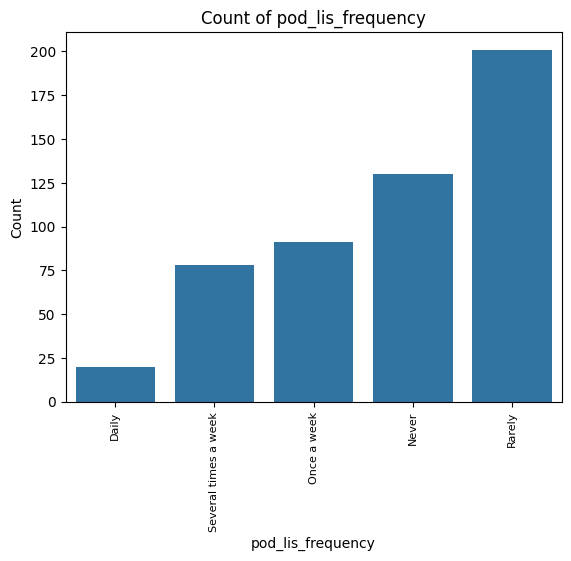

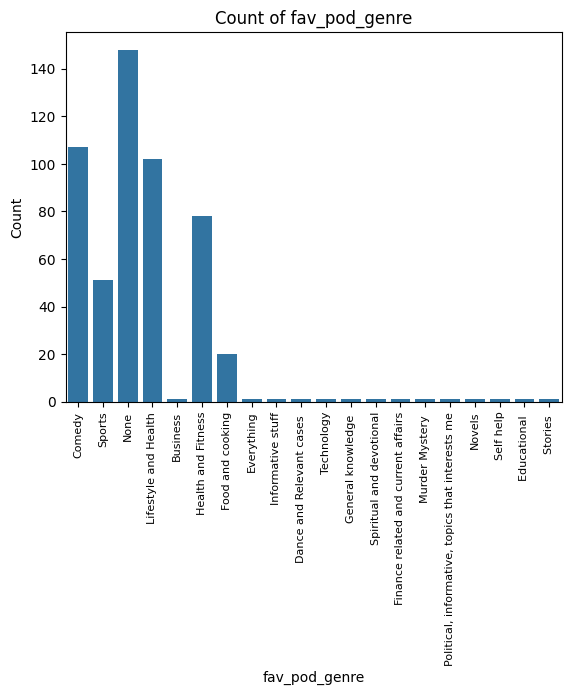

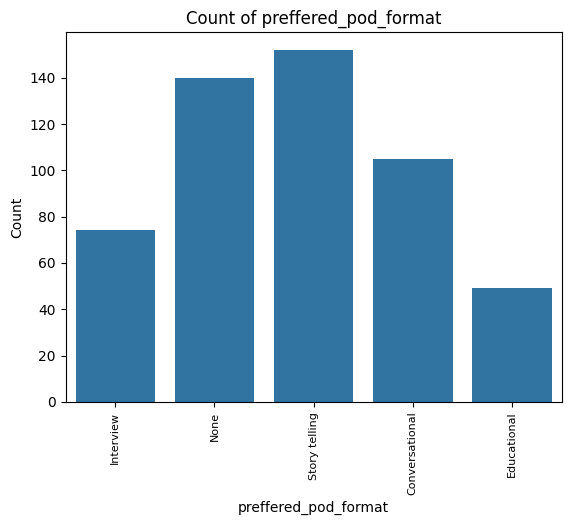

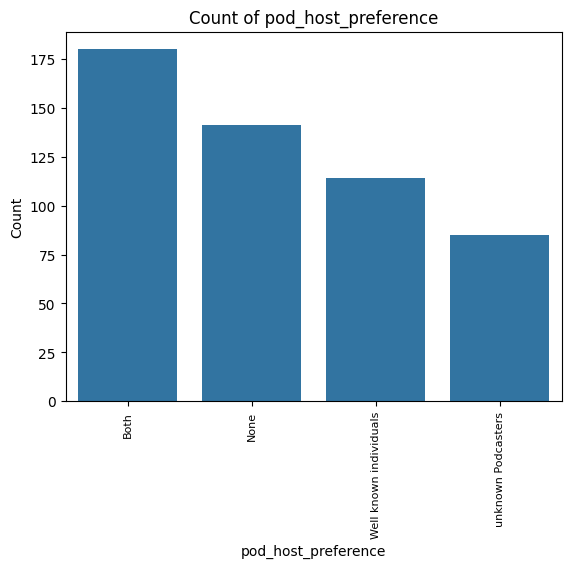

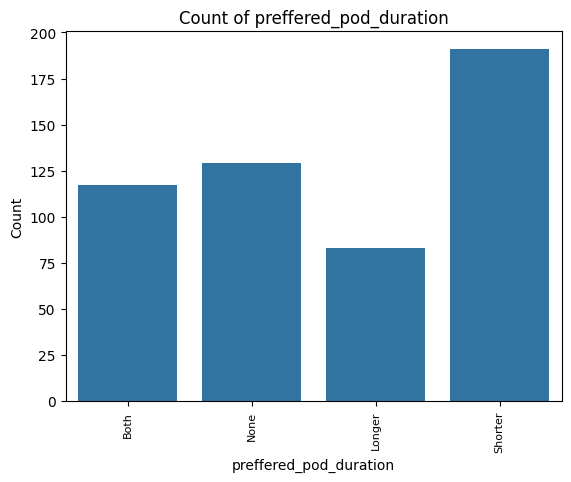

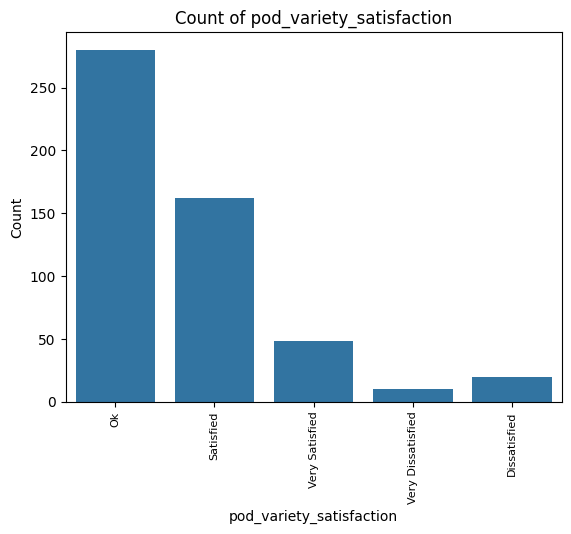

In [10]:
for n in df.columns:
    sns.countplot(data=df, x=n)
    plt.title(f'Count of {n}')
    plt.xlabel(n)
    plt.ylabel('Count')
    plt.xticks(rotation=90, fontsize=8)
    plt.show()

### Insights:
- Most Spotify users are female and age between 20 and 35.
- Most Spotify users are free users, with low willingness to subscribe.
- Spotify users prefer music over podcasts.
- Smartphones are the top choice among all listening devices.
- Melody is the most popular music genre.
- Throughout the day, most users like to listen to music at night.
- Relaxation and stress relief are the main moods that influence users' choice of music.
- Travelling is the most common occasion for users to listen to music.
- Recommendations and playlists are important ways for users to discover new music.

## Bivariate Analysis
### We will also try to explore the relationship between user subscription plan and other variables.

<ipython-input-11-051f40d92f21>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.flat[i].set_xticklabels(ax.flat[i].get_xticklabels(), rotation=90)
<ipython-input-11-051f40d92f21>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.flat[i].set_xticklabels(ax.flat[i].get_xticklabels(), rotation=90)
<ipython-input-11-051f40d92f21>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.flat[i].set_xticklabels(ax.flat[i].get_xticklabels(), rotation=90)
<ipython-input-11-051f40d92f21>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.flat[i].set_xticklabels(ax.flat[i].get_xticklabels(), rotation=90)
<ipython-input-11-051f40d92f21>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.flat[i].set_xticklabels(ax.flat[i].get_xticklabels(), rotation=90)
<ipython-input-11-051f40d92f21>:6: UserWarning: FixedFormatter should only be used togethe

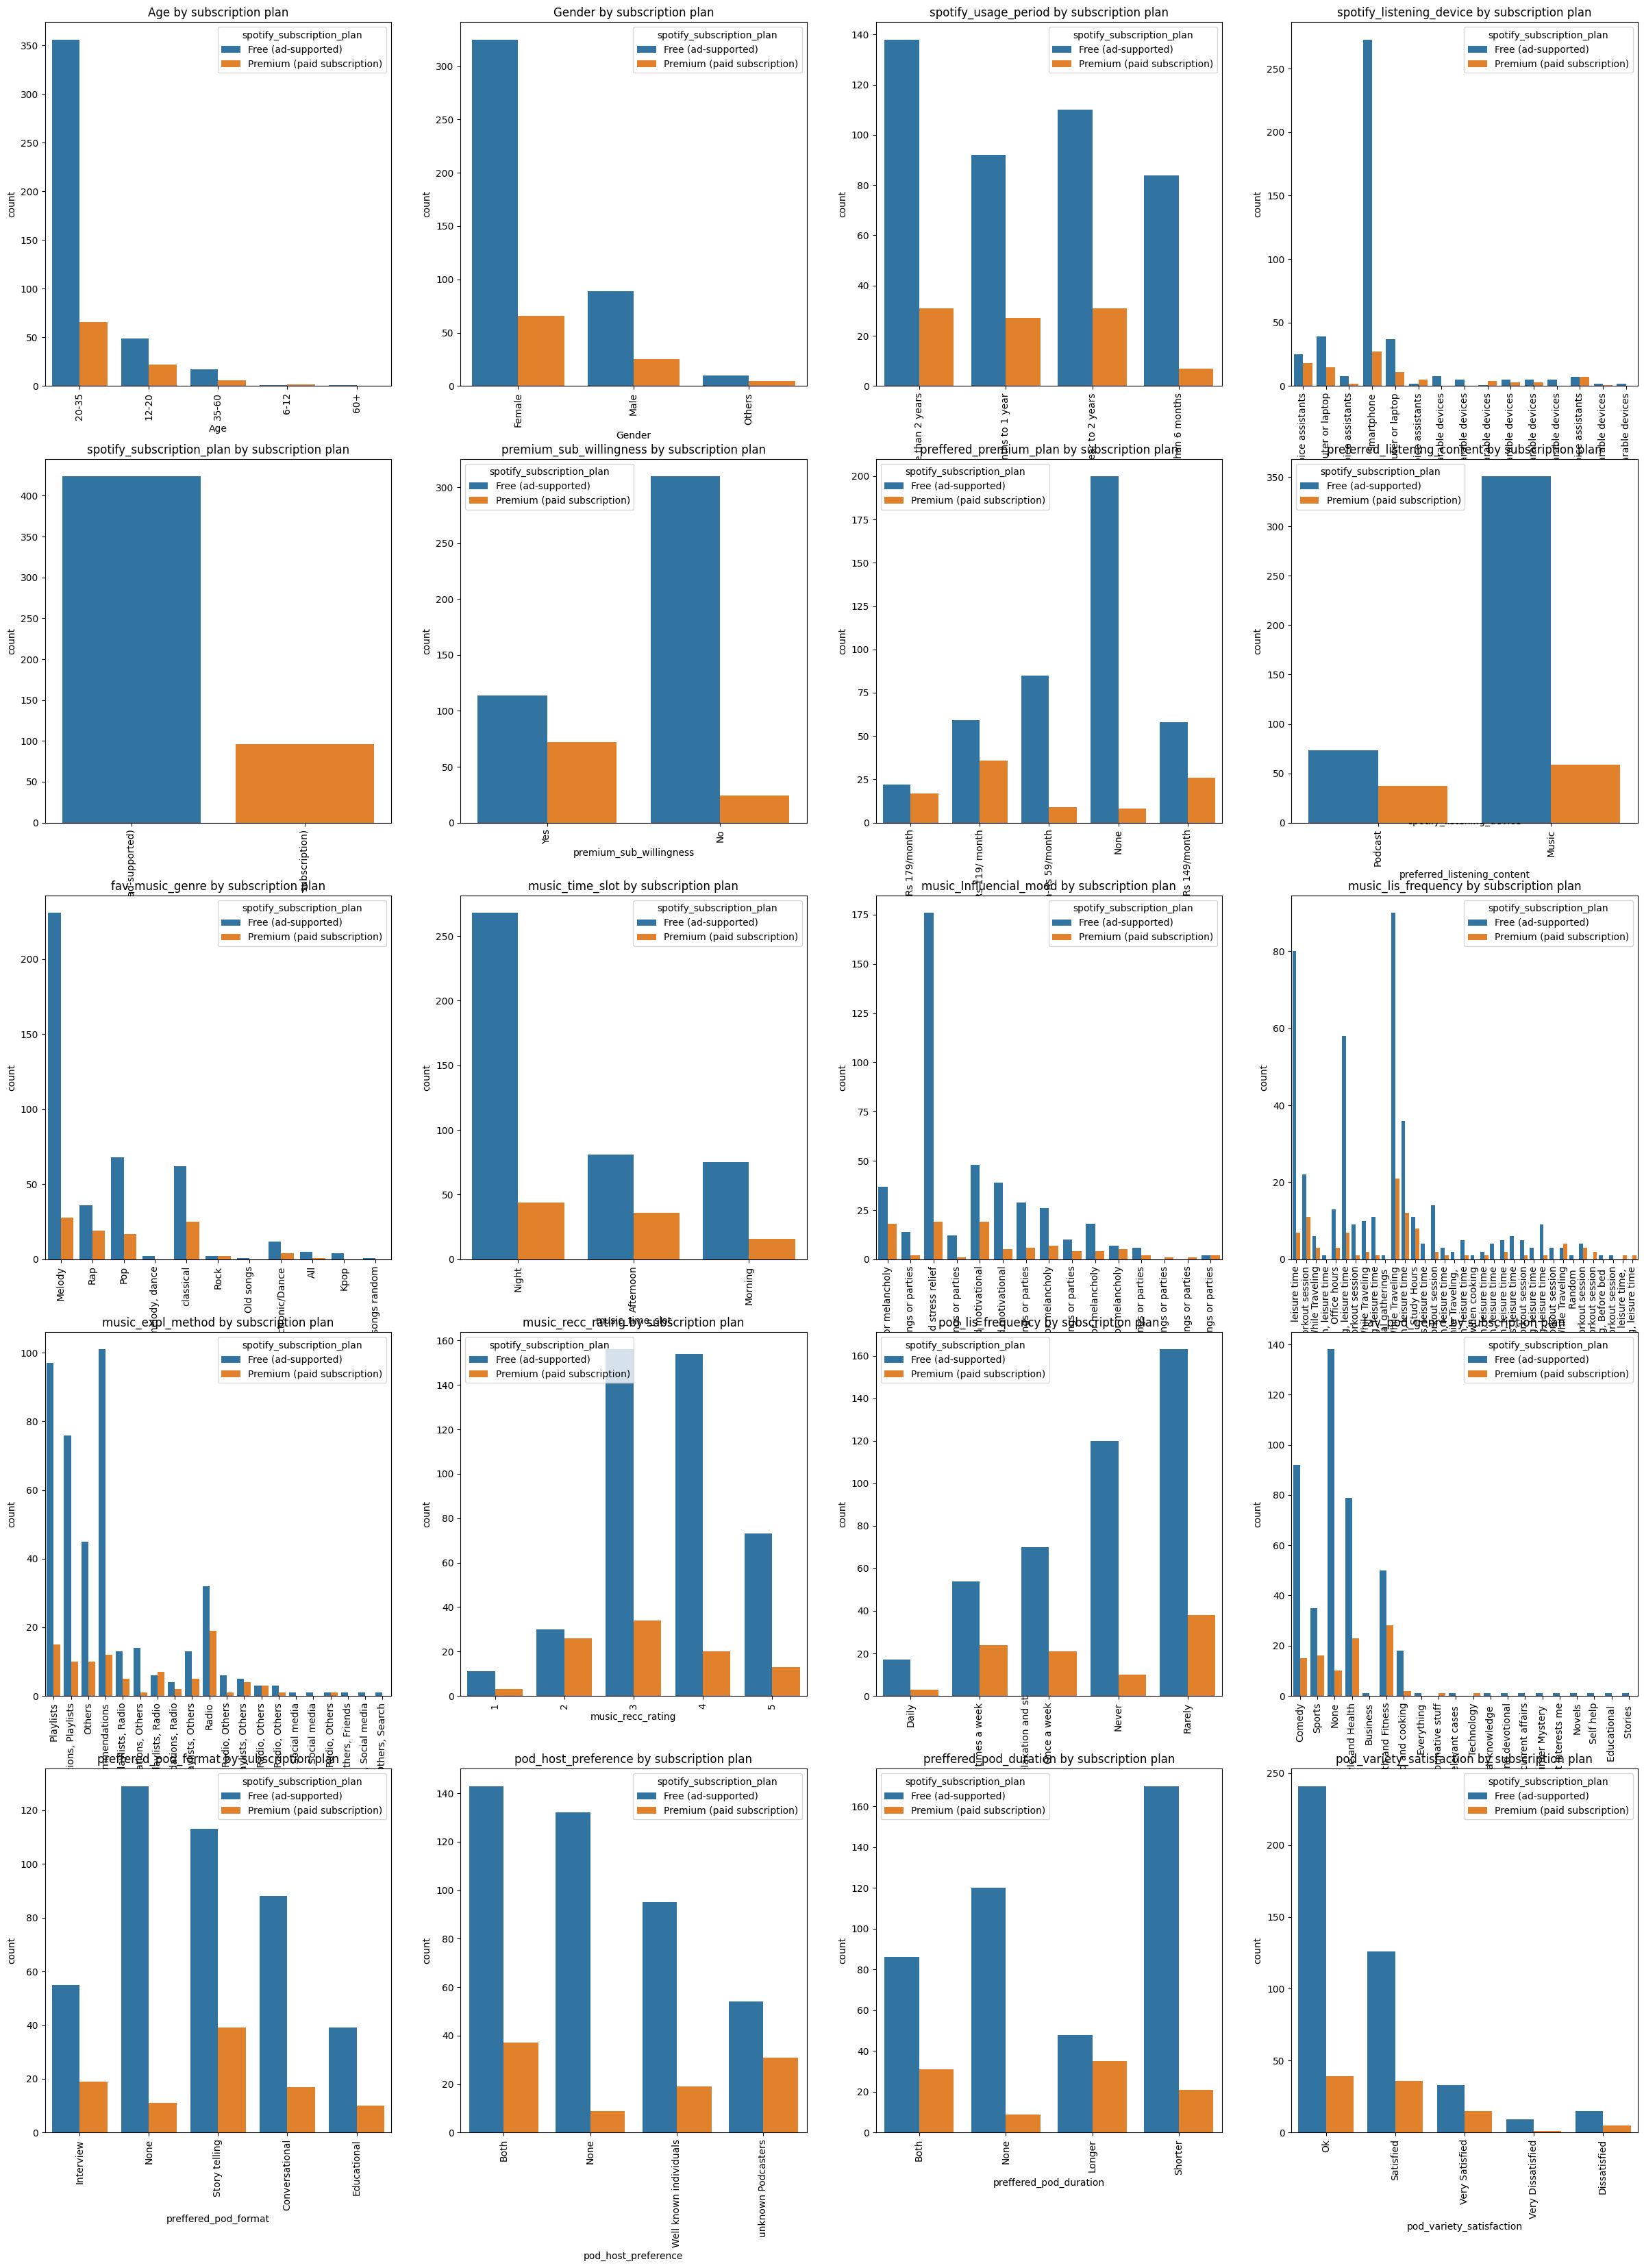

In [11]:
fig, ax = plt.subplots(5,4,figsize = (30, 40))

for i, column in enumerate(df.columns):
    sns.countplot(x = column, hue = 'spotify_subscription_plan', data = df, ax = ax.flat[i])
    ax.flat[i].set_title(f"{column} by subscription plan")
    ax.flat[i].set_xticklabels(ax.flat[i].get_xticklabels(), rotation=90)

plt.show()

### Insights:
- Paid users are more willing to subscribe and prefer the individual plan ($119 per month).
- Compared to free users, the difference in preference between podcasts and music is not so strong among paid users.
- Radio is the most used way for paid users to explore music.  
- Health and fitness is the most popular type of podcast among paid users.
- Paid users enjoy podcasts in the form of storytelling most.
- Most free users prefer shorter podcasts, while paid users prefer longer podcasts.

# 4. MODELING
---

## Train Test Data Split

In [12]:
X = df.drop(['spotify_subscription_plan'], axis = 1)
y = df['spotify_subscription_plan']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((348, 19), (172, 19))

## Encoding categorical variables

In [13]:
y_col = 'spotify_subscription_plan'
encoder = ce.OrdinalEncoder(col for col in df.columns if col != y_col)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

## Random Forest Model

In [14]:
clf = RandomForestClassifier(n_estimators = 50, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Check the model accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7907


## Feature Importance

In [15]:
feature_scores = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_scores

,0
preffered_premium_plan,0.113907
spotify_listening_device,0.090408
premium_sub_willingness,0.088650
music_Influencial_mood,0.072657
music_expl_method,0.063860
music_lis_frequency,0.058361
music_recc_rating,0.057401
fav_music_genre,0.051574
preffered_pod_duration,0.048582
fav_pod_genre,0.046698


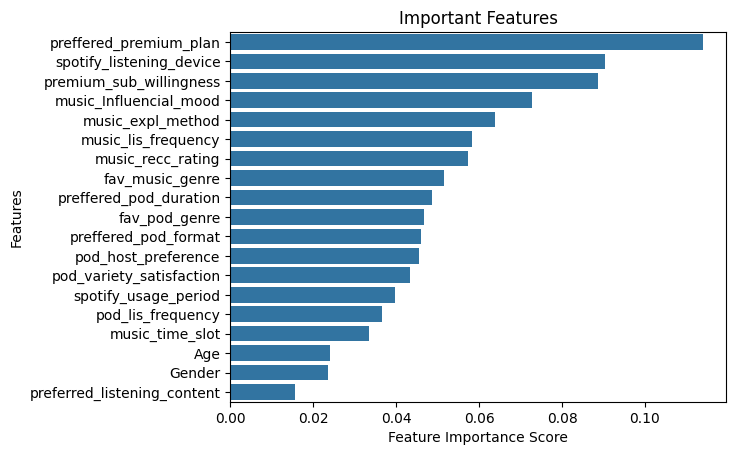

In [16]:
# Visualize
sns.barplot(x = feature_scores, y = feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')

plt.show()

In [17]:
X = df.drop(['spotify_subscription_plan','preferred_listening_content'], axis = 1)
y = df['spotify_subscription_plan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

notx_col = 'spotify_subscription_plan','preferred_listening_content'
encoder = ce.OrdinalEncoder(col for col in df.columns if col != notx_col)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

clf = RandomForestClassifier(n_estimators = 50, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Model accuracy score with preferred_listening_content variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with preferred_listening_content variable removed : 0.8081


After removing the least important variable *preferred_listening_content*, the model accuracy score increased from 0.7904 to 0.8081.
We also try to remove the second least important variable *Gender*, but the accuracy then dropped to 0.7907. So we decide to keep it in the model.

# 5. EVALUATION

## Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[130   6]
 [ 27   9]]


## Classification Report

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                             precision    recall  f1-score   support

        Free (ad-supported)       0.83      0.96      0.89       136
Premium (paid subscription)       0.60      0.25      0.35        36

                   accuracy                           0.81       172
                  macro avg       0.71      0.60      0.62       172
               weighted avg       0.78      0.81      0.78       172

